
An interactive shell.

This file is designed to be launched as a PYTHONSTARTUP script.

Total dataset size:
samples: 766
features: 1850
classes: 2
Predicting people's names on the test set
0.921875
               precision    recall  f1-score   support

 Colin Powell       0.92      0.82      0.87        60
George W Bush       0.92      0.97      0.94       132

  avg / total       0.92      0.92      0.92       192

[[ 49  11]
 [  4 128]]


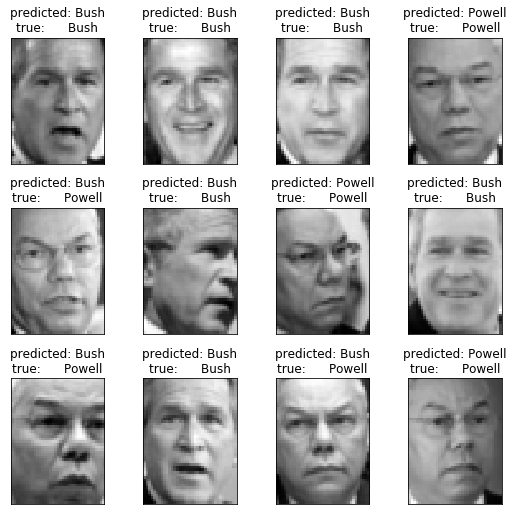

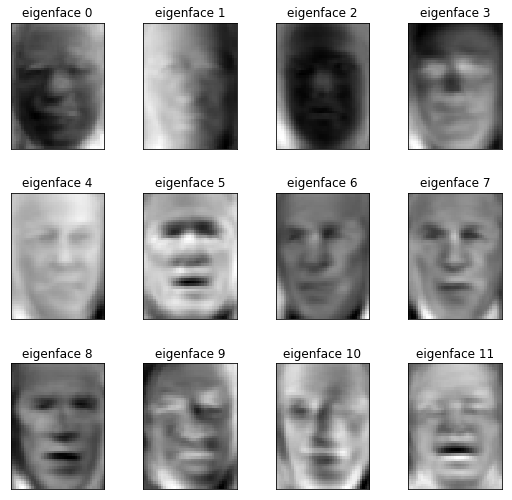

--- 6.73900008202 seconds ---


In [47]:
from __future__ import print_function

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

print(__doc__)

start_time = time.time()

#getting data information
#note that even though we can’t narrow the dataset down to specific names we CAN set the minumum faces to 200, which leaves only with 2 people - collin powell and george bush!
lfw_people = fetch_lfw_people(min_faces_per_person=200, resize=0.4)
x = lfw_people.data
features = x.shape[1] #this returns number of features (1850)
y = lfw_people.target #this is the y of the dataset elements represented as an array
names = lfw_people.target_names 

samples, h, w = lfw_people.images.shape
classes = names.shape[0]

print("Total dataset size:")
print("samples: %d" % samples)
print("features: %d" % features)
print("classes: %d" % classes)


#splitting into training and test sets
#splitting into 4 sets evenly (.25)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=47)

#extracting eigenfaces
n_components = 200
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(x_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

#Normalizing and orthogonalize the eigenfaces for training data and test data
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)


#extracting eigenfaces
n_components = 200
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(x_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

#Normalizing and orthogonalize the eigenfaces for training data and test data
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)


#Training SVM model
#’C’ represents the margin softness - the higher the C value the larger the margin for the hyperplane
#’gamma’ controls the variance of the svm and therefore its influence, this effects the shape and strength of the hyperplane
#param_gry allows the different values of C and gamma to be iterated and tested in different combinations to find the best model
param_grid = {'C': [1e5, 1e3, 5e3, 5e1, 1],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5, 1], }
model = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), param_grid)
# GrySearchCV is a search over parameter values for an estimator, this is cross-valyation setup of SVM fitting and comparing the best C and gamma 
#kernel is set to linear
model = model.fit(x_train_pca, y_train)
#using our model to predict, evaluating predictions
print("Predicting people's names on the test set")
predict = model.predict(x_test_pca)
print(model.score(x_test_pca, y_test))

print(classification_report(y_test, predict, target_names=names))
print(confusion_matrix(y_test, predict, labels=range(classes)))
#predicting and evaluation whether or not predictions were true, printing top faces
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(predict, y_test, names, i):
    pred_name = names[predict[i]].rsplit(' ', 1)[-1]
    true_name = names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(predict, y_test, names, i)
                     for i in range(predict.shape[0])]

plot_gallery(x_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

